# PROJECT 3 : CHURN REDUCTION

### Introduction
___The objective of this Case is to predict customer behaviour and to develop an algorithm to predict the churn score based on usage pattern.___

## Library Importing

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
os.chdir('D:/Data Science/EDWISOR/2_PORTFOLIO/project 3')

## Self-Defined Function

In [2]:
#Creating the function
def model_acc(actual,predict):
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(actual, predict).ravel()
    total= tn+fp+fn+tp
    accuracy = ((tp+tn)/total)*100
    error_rate = ((fp+fn)/total)*100
    specificity = (tn/(tn+fp))*100
    recall = (tp/(tp+fn))*100
    false_positive = (fp/(fp+tn))*100
    false_negative = (fn/(fn+tp))*100
    print('=============================================\n\
Accuracy :{acc}%\t\tError Rate :{error}%\n\
Specificity :{spe}%\tRecall :{rec}%\n\
False Positive :{falp}%\tFasle Negative :{faln}%\n\
============================================='.\
          format(acc = round(accuracy,2), error= round(error_rate,2),spe=round(specificity,2),rec=round(recall,2),\
                  falp=round(false_positive,2),faln=round(false_negative,2)))
    
    print(confusion_matrix(actual, predict))
    return accuracy, error_rate, specificity, recall, false_positive, false_negative
###########################################################################################
# Normalized the the data set with respect to the columns porvided
def normalize(data,columns):
    for i in columns:
        if i in list(data.columns):
            print(i)
            minimum , maximum = data[i].min(), data[i].max()
            data[i] = (data[i] - minimum)/(maximum - minimum)
    return data

## IMPORTING THE DATA SET
## 1. EXPLORATORY DATA ANALYSIS

In [3]:
Train_data = pd.read_csv( 'Train_data.csv', header = 0)
Train_data.columns = Train_data.columns.str.replace(' ','_')
Test_data = pd.read_csv('Test_data.csv', header = 0)
Test_data.columns = Test_data.columns.str.replace(' ','_')
print('Train data size is', Train_data.shape)
print('Test data size is', Test_data.shape)
Train_data.head(3)

Train data size is (3333, 21)
Test data size is (1667, 21)


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


### __Observations__
1. __Train data set has 3333 observations and 21 feature and, test data set has 1667 observations and same number of features.__
2. __As per the above chunk of an data set, some of the features are categorical in nature and others are numerical.__


Categorical features: State, area_code, international_plan, voice_mail_plan and Churn.

Numerical features:'number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge',
'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls',
'total_night_charge','total_intl_minutes','total_intl_calls', and 'total_intl_charge'


In [4]:
categorical_col = ['state','area_code','international_plan','voice_mail_plan', 'Churn']
numerical_col = ['number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge',  \
                 'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes',  \
                 'total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls',   \
                 'total_intl_charge' ]

In [5]:
Train_data = Train_data.drop(['phone_number'], axis = 1)

In [6]:
for col in categorical_col:
    Train_data[col] = pd.Categorical(Train_data[col])
# CONVERTING THE DATA TYPE INTO CATEGORICAL

<Figure size 432x288 with 0 Axes>

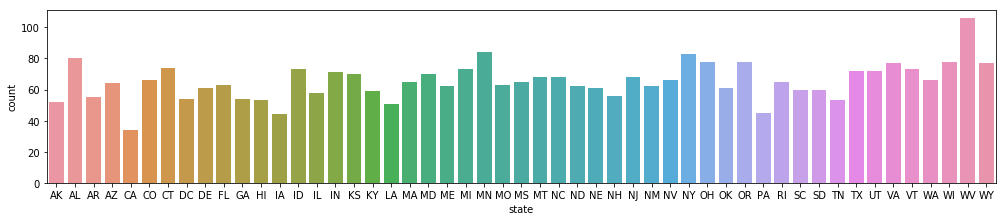

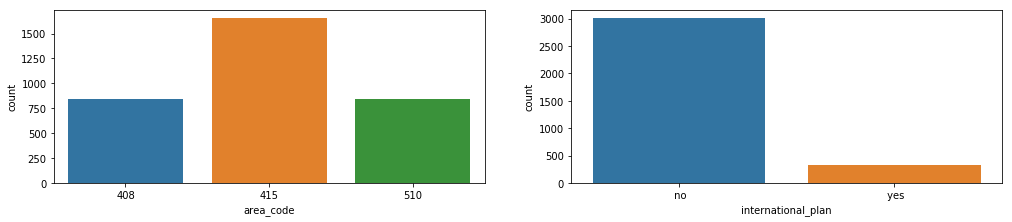

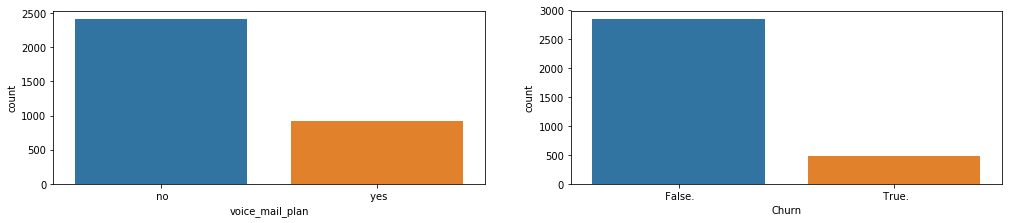

In [7]:
plt.figure(1)
plt.figure(figsize=(17,7))
plt.subplot(211)
sns.countplot(Train_data['state'])

plt.figure(2)
plt.figure(figsize=(17,7))
plt.subplot(221)
sns.countplot(Train_data['area_code'])
plt.subplot(222)
sns.countplot(Train_data['international_plan'])
plt.figure(3)
plt.figure(figsize=(17,7))
plt.subplot(223)
sns.countplot(Train_data['voice_mail_plan'])
plt.subplot(224)
sns.countplot(Train_data['Churn'])
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
Train_data['state'] = label.fit_transform(Train_data['state'])
Train_data.Churn = label.fit_transform(Train_data.Churn)
Train_data.voice_mail_plan = label.fit_transform(Train_data.voice_mail_plan)
Train_data.area_code = label.fit_transform(Train_data.area_code)
Train_data.international_plan = label.fit_transform(Train_data.international_plan)

for col in categorical_col:Train_data[col] = pd.Categorical(Train_data[col])

In [9]:
Train_data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Observation:
Minimum value and maximum value of the recpective features varies too much.
Data set should be normalized before applying any machine learning algorithms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027346775BE0>,
      dtype=object)

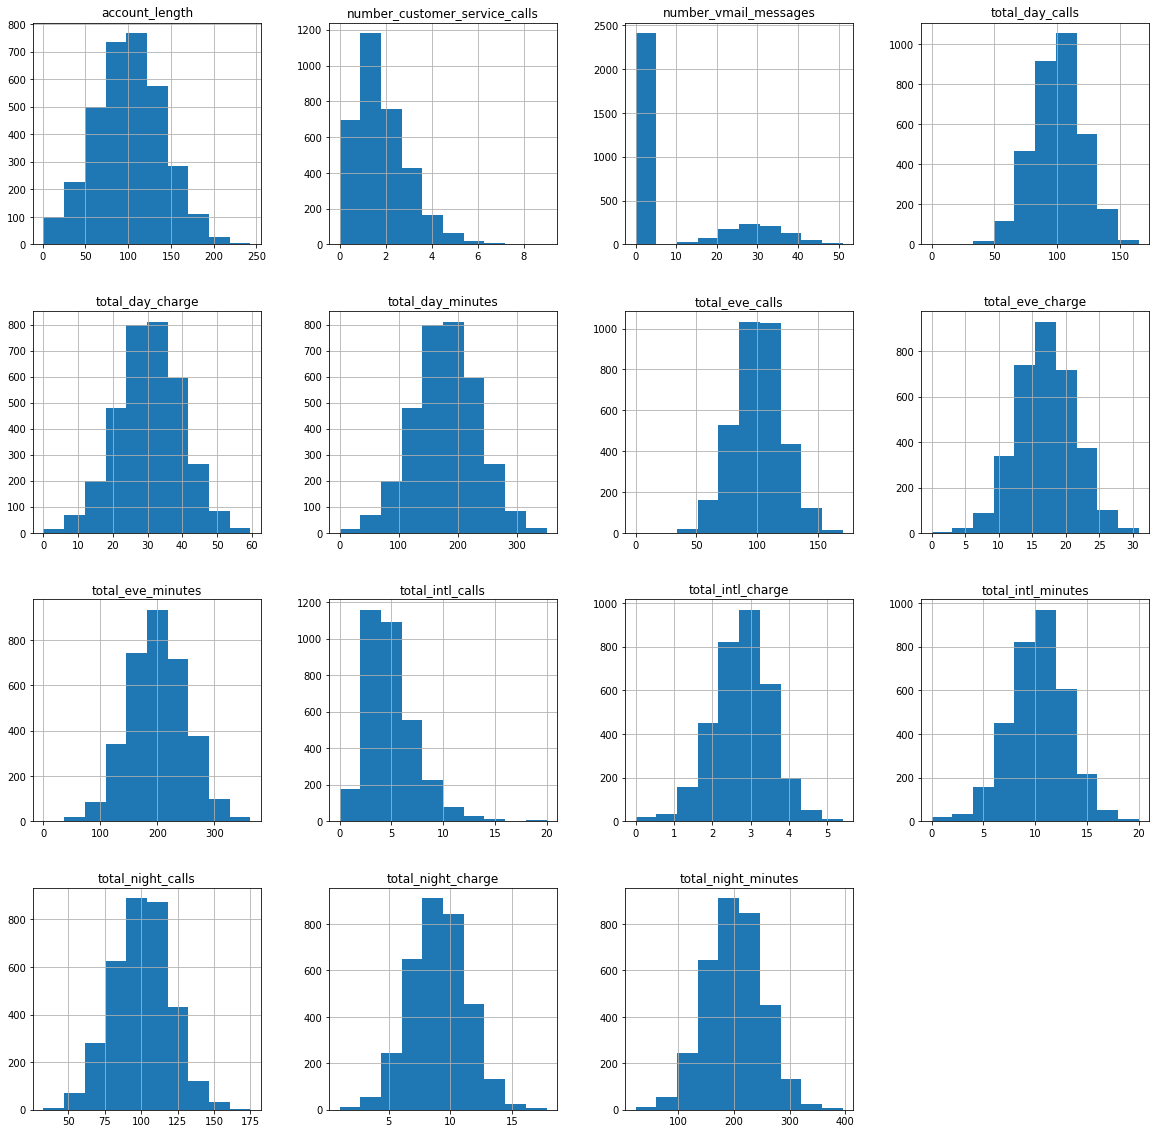

In [10]:
Train_data.hist(figsize=(20,20))

#### Observation
Data distribution of not normal
total_intli_call and number_customer_service_calls are skewed towards right (POSITIVELY SKEWED VARAIBLE).

# DATA PRE-PROCESSING

## 1. MISSING VALUE CHECK

In [11]:
Train_data.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
Churn                            0
dtype: int64

__OBSERVATION__
1. As per the above statement our data set do not have any missing value.

## 2. OUTLIER ANALYSIS

+++=========================================================================================+++
OUTLIER PRESENT IN  number_vmail_messages


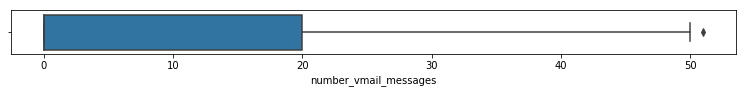

25% :0.0   Median :0.0   75% :20.0   IQR :20.0
Minimum :0   Lower Fence :-30.0   Upper Fence :50.0   Maximum :51
Number of Outliers:1   Percentage of Outlier in number_vmail_messages :0.0%
+++=========================================================================================+++
OUTLIER PRESENT IN  total_day_minutes


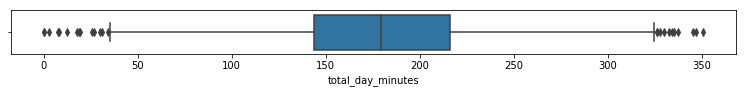

25% :143.7   Median :179.4   75% :216.4   IQR :72.70000000000002
Minimum :0.0   Lower Fence :34.65   Upper Fence :325.45   Maximum :350.8
Number of Outliers:25   Percentage of Outlier in total_day_minutes :1.0%
+++=========================================================================================+++
OUTLIER PRESENT IN  total_day_calls


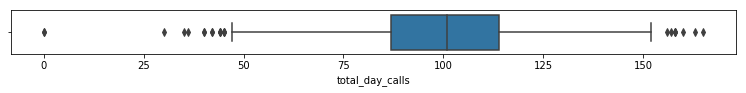

25% :87.0   Median :101.0   75% :114.0   IQR :27.0
Minimum :0   Lower Fence :46.5   Upper Fence :154.5   Maximum :165
Number of Outliers:23   Percentage of Outlier in total_day_calls :1.0%
+++=========================================================================================+++
OUTLIER PRESENT IN  total_day_charge


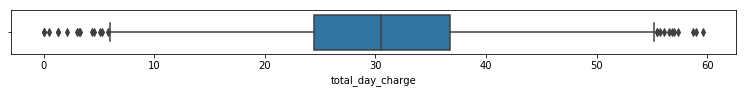

25% :24.43   Median :30.5   75% :36.79   IQR :12.36
Minimum :0.0   Lower Fence :5.89   Upper Fence :55.33   Maximum :59.64
Number of Outliers:25   Percentage of Outlier in total_day_charge :1.0%
+++=========================================================================================+++
OUTLIER PRESENT IN  total_eve_minutes


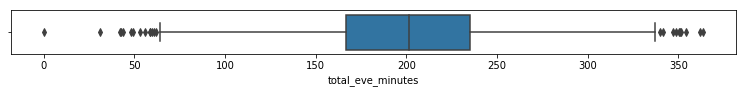

25% :166.6   Median :201.4   75% :235.3   IQR :68.70000000000002
Minimum :0.0   Lower Fence :63.55   Upper Fence :338.35   Maximum :363.7
Number of Outliers:24   Percentage of Outlier in total_eve_minutes :1.0%
+++=========================================================================================+++
OUTLIER PRESENT IN  total_eve_calls


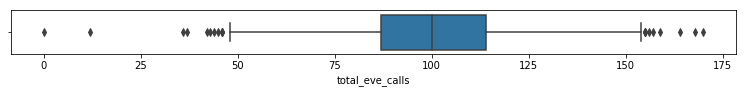

25% :87.0   Median :100.0   75% :114.0   IQR :27.0
Minimum :0   Lower Fence :46.5   Upper Fence :154.5   Maximum :170
Number of Outliers:20   Percentage of Outlier in total_eve_calls :1.0%
+++=========================================================================================+++
OUTLIER PRESENT IN  total_eve_charge


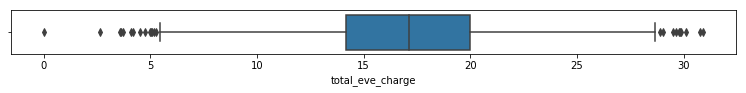

25% :14.16   Median :17.12   75% :20.0   IQR :5.84
Minimum :0.0   Lower Fence :5.4   Upper Fence :28.76   Maximum :30.91
Number of Outliers:24   Percentage of Outlier in total_eve_charge :1.0%
+++=========================================================================================+++
OUTLIER PRESENT IN  total_night_minutes


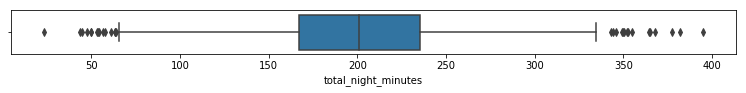

25% :167.0   Median :201.2   75% :235.3   IQR :68.30000000000001
Minimum :23.2   Lower Fence :64.55   Upper Fence :337.75   Maximum :395.0
Number of Outliers:30   Percentage of Outlier in total_night_minutes :1.0%
+++=========================================================================================+++
OUTLIER PRESENT IN  total_night_calls


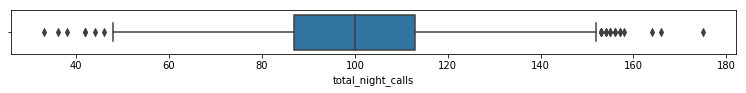

25% :87.0   Median :100.0   75% :113.0   IQR :26.0
Minimum :33   Lower Fence :48.0   Upper Fence :152.0   Maximum :175
Number of Outliers:22   Percentage of Outlier in total_night_calls :1.0%
+++=========================================================================================+++
OUTLIER PRESENT IN  total_night_charge


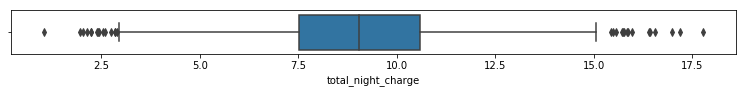

25% :7.52   Median :9.05   75% :10.59   IQR :3.0700000000000003
Minimum :1.04   Lower Fence :2.915   Upper Fence :15.195   Maximum :17.77
Number of Outliers:30   Percentage of Outlier in total_night_charge :1.0%
+++=========================================================================================+++
OUTLIER PRESENT IN  total_intl_minutes


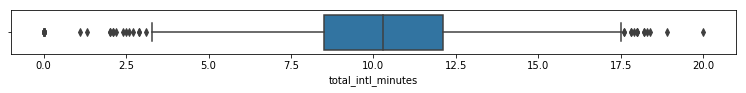

25% :8.5   Median :10.3   75% :12.1   IQR :3.5999999999999996
Minimum :0.0   Lower Fence :3.1   Upper Fence :17.5   Maximum :20.0
Number of Outliers:45   Percentage of Outlier in total_intl_minutes :1.0%
+++=========================================================================================+++
OUTLIER PRESENT IN  total_intl_calls


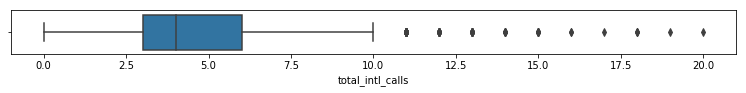

25% :3.0   Median :4.0   75% :6.0   IQR :3.0
Minimum :0   Lower Fence :-1.5   Upper Fence :10.5   Maximum :20
Number of Outliers:78   Percentage of Outlier in total_intl_calls :2.0%
+++=========================================================================================+++
OUTLIER PRESENT IN  total_intl_charge


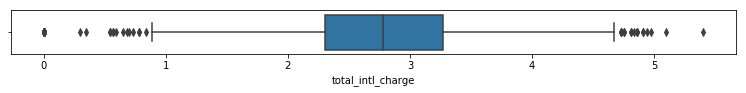

25% :2.3   Median :2.78   75% :3.27   IQR :0.9700000000000002
Minimum :0.0   Lower Fence :0.845   Upper Fence :4.725   Maximum :5.4
Number of Outliers:49   Percentage of Outlier in total_intl_charge :1.0%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Total outliers is 396
Percentage of outliers is 12.0%


In [12]:
count=0
for i in numerical_col:
    q75,q25 = np.percentile(Train_data.loc[:,i],[75,25])
    iqr=q75-q25
    l_fence,u_fence = round(q25-(iqr*1.5),4),round(q75+(iqr*1.5),4)
    total_outlier = len([num for num in Train_data[i] if num > u_fence or num < l_fence ])
    if total_outlier != 0: 
        print('+++=========================================================================================+++')
        print ('OUTLIER PRESENT IN ',i)
        plt.figure(figsize=(13,0.8))
        sns.boxplot(Train_data[i])
        plt.show()
        print('25% :{}   Median :{}   75% :{}   IQR :{}'. \
              format(q25,Train_data[i].median(),q75,iqr) )
        print('Minimum :{}   Lower Fence :{}   Upper Fence :{}   Maximum :{}'  \
              .format(Train_data[i].min(),l_fence,u_fence,Train_data[i].max()))
        print('Number of Outliers:{}   Percentage of Outlier in {} :{}%'  \
              .format(total_outlier,i,round(total_outlier/len(Train_data),2)*100))
        count = count + total_outlier

    else: print('+++++++----NO OUTLIER IN --->',i)

        
print('%'*40)
print('Total outliers is {}'.format(count))

print('Percentage of outliers is {}%'.format(round(count/Train_data.shape[0],2)*100))

### Process 1 Outlier deletation

In [13]:
Process_data = Train_data.copy()
for i in numerical_col:
    print(i)
    q75, q25 = np.percentile(Process_data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min, max = q25 - (iqr*1.5),q75 + (iqr*1.5)
    print('Maximim :{ma}\tMinimum :{mi}'.format( ma= max, mi= min))
    Process_data = Process_data.drop(Process_data[Process_data.loc[:,i] < min].index)
    Process_data = Process_data.drop(Process_data[Process_data.loc[:,i] > max].index)
    #print(i, '--> DONE')

number_vmail_messages
Maximim :50.0	Minimum :-30.0
total_day_minutes
Maximim :325.30000000000007	Minimum :34.69999999999993
total_day_calls
Maximim :154.5	Minimum :46.5
total_day_charge
Maximim :55.14875000000001	Minimum :6.078749999999996
total_eve_minutes
Maximim :338.23750000000007	Minimum :63.73749999999994
total_eve_calls
Maximim :154.5	Minimum :46.5
total_eve_charge
Maximim :28.650000000000002	Minimum :5.529999999999998
total_night_minutes
Maximim :337.75	Minimum :64.54999999999998
total_night_calls
Maximim :152.0	Minimum :48.0
total_night_charge
Maximim :15.141250000000001	Minimum :2.951249999999999
total_intl_minutes
Maximim :17.5	Minimum :3.1000000000000005
total_intl_calls
Maximim :10.5	Minimum :-1.5
total_intl_charge
Maximim :4.695	Minimum :0.8949999999999996


In [14]:
print(Process_data.shape)
print(((3333-3064)/3333)*100)

(3064, 20)
8.070807080708072


8% of observation decreased

### Process 2 Outlier imputation

In [15]:
Process_data2 = Train_data.copy()
for i in numerical_col:
    print(i)
    q75_1, q25_1 = np.percentile(Process_data2.loc[:,i], [75 ,25])
    iqr2 = q75_1 - q25_1
    minimum, maximum = q25_1 - (iqr2*1.5),q75_1 + (iqr2*1.5)
    print('Maximim:', maximum)
    print('Minimum:', minimum)
    Process_data2[i] = np.where(Process_data2[i] < minimum , np.nan, Process_data2[i])
    Process_data2[i] = np.where(Process_data2[i] > maximum , np.nan, Process_data2[i])

number_vmail_messages
Maximim: 50.0
Minimum: -30.0
total_day_minutes
Maximim: 325.45000000000005
Minimum: 34.64999999999996
total_day_calls
Maximim: 154.5
Minimum: 46.5
total_day_charge
Maximim: 55.33
Minimum: 5.890000000000001
total_eve_minutes
Maximim: 338.35
Minimum: 63.54999999999997
total_eve_calls
Maximim: 154.5
Minimum: 46.5
total_eve_charge
Maximim: 28.759999999999998
Minimum: 5.4
total_night_minutes
Maximim: 337.75
Minimum: 64.54999999999998
total_night_calls
Maximim: 152.0
Minimum: 48.0
total_night_charge
Maximim: 15.195
Minimum: 2.914999999999999
total_intl_minutes
Maximim: 17.5
Minimum: 3.1000000000000005
total_intl_calls
Maximim: 10.5
Minimum: -1.5
total_intl_charge
Maximim: 4.7250000000000005
Minimum: 0.8449999999999995


In [16]:
Process_data2.isna().sum()

state                             0
account_length                    0
area_code                         0
international_plan                0
voice_mail_plan                   0
number_vmail_messages             1
total_day_minutes                25
total_day_calls                  23
total_day_charge                 25
total_eve_minutes                24
total_eve_calls                  20
total_eve_charge                 24
total_night_minutes              30
total_night_calls                22
total_night_charge               30
total_intl_minutes               46
total_intl_calls                 78
total_intl_charge                49
number_customer_service_calls     0
Churn                             0
dtype: int64

In [17]:
from fancyimpute import KNN

Using TensorFlow backend.


In [18]:
Process_data2 = pd.DataFrame(KNN(k = 3).complete(Process_data2), columns=Process_data2.columns)

Imputing row 1/3333 with 0 missing, elapsed time: 4.506
Imputing row 101/3333 with 0 missing, elapsed time: 4.508
Imputing row 201/3333 with 0 missing, elapsed time: 4.511
Imputing row 301/3333 with 0 missing, elapsed time: 4.512
Imputing row 401/3333 with 0 missing, elapsed time: 4.515
Imputing row 501/3333 with 0 missing, elapsed time: 4.517
Imputing row 601/3333 with 0 missing, elapsed time: 4.519
Imputing row 701/3333 with 0 missing, elapsed time: 4.521
Imputing row 801/3333 with 0 missing, elapsed time: 4.523
Imputing row 901/3333 with 0 missing, elapsed time: 4.527
Imputing row 1001/3333 with 0 missing, elapsed time: 4.529
Imputing row 1101/3333 with 0 missing, elapsed time: 4.531
Imputing row 1201/3333 with 1 missing, elapsed time: 4.533
Imputing row 1301/3333 with 0 missing, elapsed time: 4.535
Imputing row 1401/3333 with 2 missing, elapsed time: 4.537
Imputing row 1501/3333 with 0 missing, elapsed time: 4.539
Imputing row 1601/3333 with 0 missing, elapsed time: 4.540
Imputing 

In [19]:
Process_data2.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
Churn                            0
dtype: int64

## 3. FEATURE SELECTION

#### 1. Feature selection on numerical varaibles

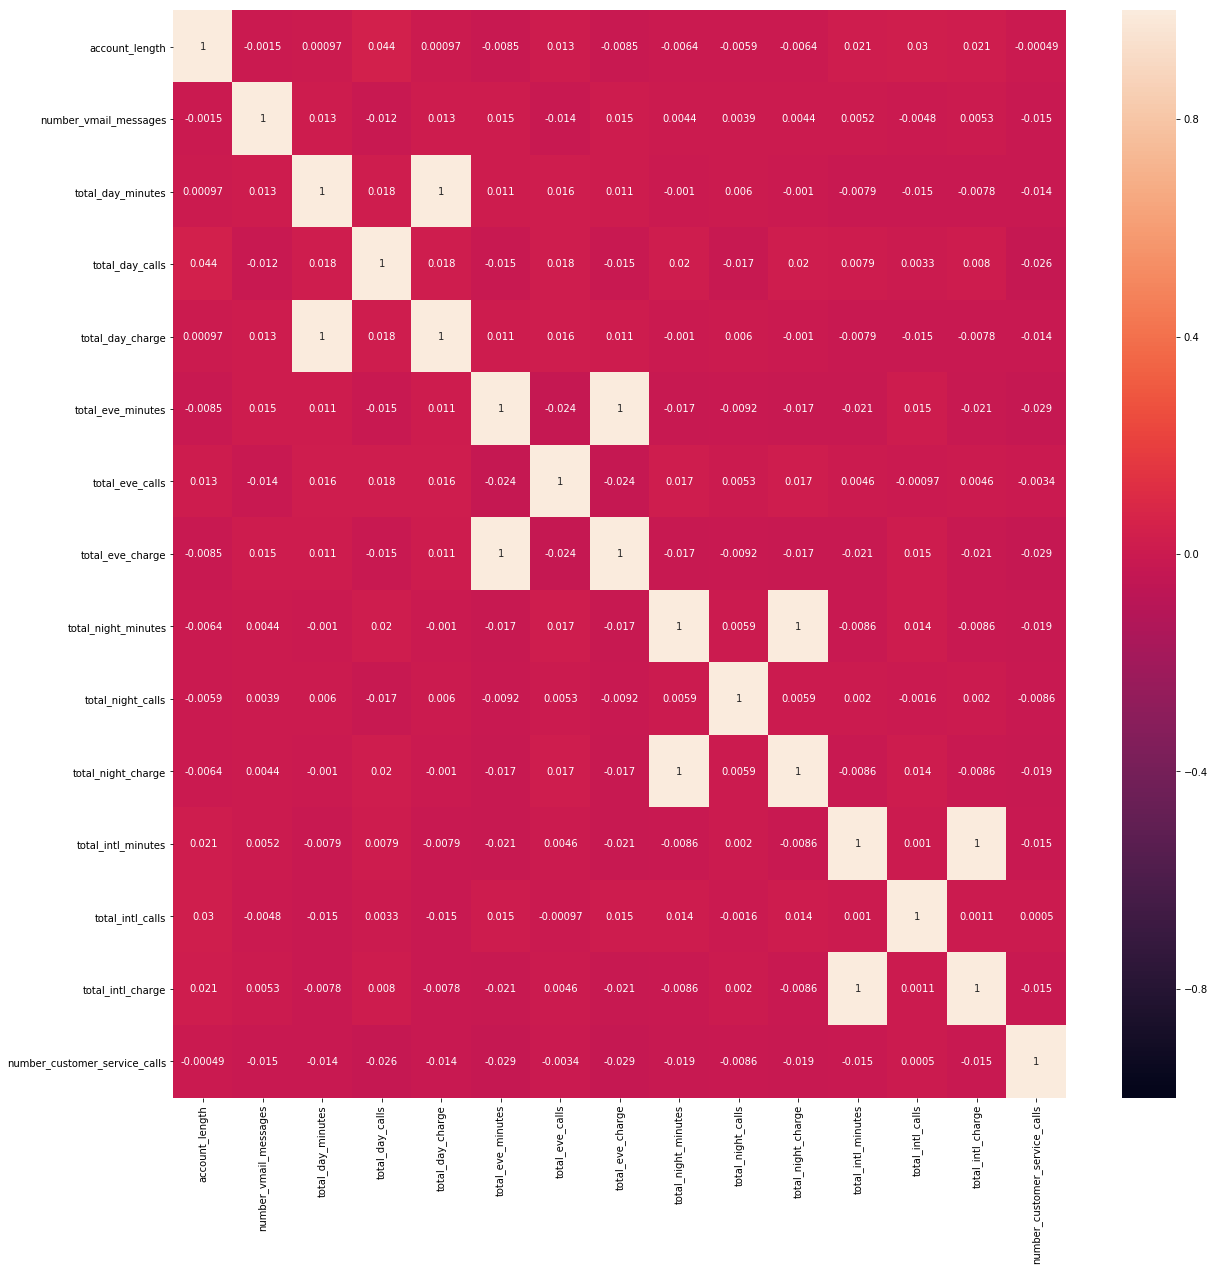

In [20]:
plt.figure(figsize=(20,20))
corr = Process_data.corr()
abc = sns.heatmap(corr, annot= True,mask = np.zeros_like(corr, dtype = np.bool), vmin = -1, vmax = 1 )
plt.show()
abc.figure.savefig('output.png')

### Observation:
__As expected, with repect to the above figure following feature are highly correlated with each other :__
1. total_day_charge and total_day_minutes     (Correlation : 1)
2. total_eve_charge and total_eve_minutes     (Correlation : 1)
3. total_night_charge and total_night_minutes  (Correlation : 1)
4. total_intl_charge and total_intl_minutes    (Correlation : 1)

__It's obvisous, as the amount charges by the operators are directly proportaional to total minutes__

In [21]:
Process_data = Process_data.drop(['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'], axis=1)


Process_data2 = Process_data2.drop(['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'], axis=1)




#### 2. Feature selection on Categorical varaibles

In [22]:
for col in categorical_col:
    if col != 'Churn':
        chi2, p, dof, ex = chi2_contingency(pd.crosstab(Process_data['Churn'], Process_data[col]))
        if p<0.05: print('{}:{}'.format(col,p))
        else: print('{}:{}\t**Feature should be remove'.format(col,p))

state:0.00260289126000585
area_code:0.9543245810778995	**Feature should be remove
international_plan:5.446645492759293e-44
voice_mail_plan:1.5402685760004297e-07


In [23]:
Process_data = Process_data.drop(['area_code'], axis=1)


Process_data2 = Process_data2.drop(['area_code'], axis=1)


In [24]:
Process_data.head(5)

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,16,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,35,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,31,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
4,36,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
5,1,118,1,0,0,98,37.98,101,18.75,118,9.18,6,1.70,0,0


### 4. NORMALISATION

In [25]:
normalized_list = []
for col in numerical_col: normalized_list.append(col)
normalized_list.append('account_length')

In [26]:
Process_data = normalize(Process_data, normalized_list)

number_vmail_messages
total_day_calls
total_day_charge
total_eve_calls
total_eve_charge
total_night_calls
total_night_charge
total_intl_calls
total_intl_charge
account_length


In [27]:
Process_data.describe()

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000,3064.000000
mean,0.413463,0.162232,0.511292,0.498790,0.491250,0.500104,0.498842,0.503043,0.366696,0.496688,1.574739
std,0.164584,0.274081,0.184172,0.185121,0.181841,0.180571,0.183438,0.181116,0.230220,0.185906,1.325666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.301653,0.000000,0.388095,0.372160,0.367925,0.375054,0.375000,0.377686,0.222222,0.373333,1.000000
50%,0.413223,0.000000,0.514286,0.496696,0.490566,0.501514,0.500000,0.503306,0.333333,0.496000,1.000000
75%,0.520661,0.380000,0.638095,0.626446,0.613208,0.622566,0.625000,0.630579,0.555556,0.626667,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [28]:
Process_data2 = normalize(Process_data2, normalized_list)

number_vmail_messages
total_day_calls
total_day_charge
total_eve_calls
total_eve_charge
total_night_calls
total_night_charge
total_intl_calls
total_intl_charge
account_length


### Sampling
Stratified sampling

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
independent_data = Process_data.drop(['Churn'], axis=1)
dependent_data = Process_data['Churn']
x_train,x_test,y_train,y_test = train_test_split(independent_data,dependent_data, 
                                                 test_size = 0.2, random_state = 0, stratify = dependent_data  )


In [31]:
independent_data2 = Process_data2.drop(['Churn'], axis=1)
dependent_data2 = Process_data2['Churn']
x_train2,x_test2,y_train2,y_test2 = train_test_split(independent_data2,dependent_data2, 
                                                 test_size = 0.2, random_state = 0, stratify = dependent_data2  )


## MODEL DEVELOPMENT AND MODEL EVALUATION (CLASSIFICATION MODEL)

As the dependent varaible is categorical varaibles, model selection will be done based on the accuracy of classification models.
Following Machine Learning algorithm will be use to develop the classfication model:
1. Logistic Regression Algorithm.
2. Decision Tree Algorithm.
3. Random Forest Algorithm.
4. k-Nearest Neighbors Algorithm

## We have two data set
#### 1. Process1 - process1 involves outlier deletation technique
#### 2. Process2 - process2 involves outlier imputation technique
#### Other parameter remains same

# __1. Logistic Regression Algorithm__

### Process 1

In [32]:
#Outlier Deleted
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression().fit(x_train,y_train)
logistic_estimated = logistic.predict(x_test)
logistic_result = model_acc(y_test,logistic_estimated)

Accuracy :85.64%		Error Rate :14.36%
Specificity :96.77%	Recall :18.39%
False Positive :3.23%	Fasle Negative :81.61%
[[509  17]
 [ 71  16]]


C:\Users\HP-Omen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Process 2

In [33]:
#Outlier Imputed
from sklearn.linear_model import LogisticRegression
logistic2 = LogisticRegression().fit(x_train2,y_train2)
logistic_estimated2 = logistic2.predict(x_test2)
logistic_result2 = model_acc(y_test2,logistic_estimated2)

Accuracy :85.91%		Error Rate :14.09%
Specificity :97.54%	Recall :17.53%
False Positive :2.46%	Fasle Negative :82.47%
[[556  14]
 [ 80  17]]


C:\Users\HP-Omen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# As per the above parameters
### Process1 and Process2 accurary is quite similar
### Process2 tend to perform better at some extent as compare to process1 in logistic regression

In [34]:
#Experiment check

import statsmodels.api as sm
logit = sm.Logit(y_train , x_train.astype(float)).fit()
print(logit.summary2())
logit_predict = logit.predict(x_test.astype(float))
logit_value = logit_predict.copy()
logit_value['value'] = np.where(logit_value > 0.5 ,1 ,0)
logit_result = model_acc(y_test,logit_value['value'])

Optimization terminated successfully.
         Current function value: 0.352722
         Iterations 7
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.140     
Dependent Variable:     Churn                AIC:                  1757.0430 
Date:                   2019-03-19 17:56     BIC:                  1838.3025 
No. Observations:       2451                 Log-Likelihood:       -864.52   
Df Model:               13                   LL-Null:              -1004.9   
Df Residuals:           2437                 LLR p-value:          2.4335e-52
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         7.0000                                               
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------

#  __2. Decision Tree Algorithm__

### Process 1

In [35]:
#Outlier Deleted
from sklearn import tree
DTree_model = tree.DecisionTreeClassifier().fit(x_train,y_train)
DTree_estimated = DTree_model.predict(x_test)
print('Decision Tree')
Decision_result = model_acc(y_test,DTree_estimated)


Decision Tree
Accuracy :91.03%		Error Rate :8.97%
Specificity :95.63%	Recall :63.22%
False Positive :4.37%	Fasle Negative :36.78%
[[503  23]
 [ 32  55]]


In [36]:
print('Feature Importance')
for col, per in zip(x_train,DTree_model.feature_importances_):print('{c} :{p}%'.format(c=col, p = round(per*100,2)  ))

Feature Importance
state :1.69%
account_length :2.49%
international_plan :5.67%
voice_mail_plan :5.33%
number_vmail_messages :2.87%
total_day_calls :3.88%
total_day_charge :24.74%
total_eve_calls :2.72%
total_eve_charge :12.26%
total_night_calls :2.45%
total_night_charge :5.28%
total_intl_calls :8.88%
total_intl_charge :8.71%
number_customer_service_calls :13.02%


### Process 2

In [37]:
from sklearn import tree
DTree_model2 = tree.DecisionTreeClassifier().fit(x_train2,y_train2)
DTree_estimated2 = DTree_model2.predict(x_test2)
print('Decision Tree')
Decision_result2 = model_acc(y_test2,DTree_estimated2)


Decision Tree
Accuracy :91.6%		Error Rate :8.4%
Specificity :94.04%	Recall :77.32%
False Positive :5.96%	Fasle Negative :22.68%
[[536  34]
 [ 22  75]]


In [38]:
print('Feature Importance')
for col, per in zip(x_train,DTree_model2.feature_importances_):print('{c} :{p}%'.format(c=col, p = round(per*100,2)  ))

Feature Importance
state :1.68%
account_length :1.67%
international_plan :7.96%
voice_mail_plan :5.88%
number_vmail_messages :0.67%
total_day_calls :3.57%
total_day_charge :24.93%
total_eve_calls :2.95%
total_eve_charge :15.77%
total_night_calls :2.21%
total_night_charge :5.42%
total_intl_calls :7.26%
total_intl_charge :10.41%
number_customer_service_calls :9.61%


# As per the above parameters
### Process1 and Process2 accurary is quite similar
### Process2 tend to perform better at some extent as compare to process1 in Decision Tree

# __3. Random Forest Algorithm.__

### Process 1

In [39]:

from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators= 50).fit(x_train,y_train)
RF_estimated = RF_model.predict(x_test)
rf_result = model_acc(y_test,RF_estimated)

Accuracy :93.47%		Error Rate :6.53%
Specificity :99.24%	Recall :58.62%
False Positive :0.76%	Fasle Negative :41.38%
[[522   4]
 [ 36  51]]


CHECKING THE OPKTIMUM NUMBER OF TREES BASED ON THE ACCUARACY PARAMETERS

In [40]:
tree_numbers = [i*10 for i in range(1,15)]

In [41]:
accuracy, error_rate, specificity, recall, false_positive, false_negative = [],[],[],[],[],[]

for number in tree_numbers:
    from sklearn.ensemble import RandomForestClassifier
    model_build = RandomForestClassifier(n_estimators= number).fit(x_train,y_train)
    model_estimated = model_build.predict(x_test)
    rf_result = model_acc(y_test,model_estimated)
    accuracy.append(rf_result[0])
    error_rate.append(rf_result[1])
    specificity.append(rf_result[2])
    recall.append(rf_result[3])
    false_positive.append(rf_result[4])
    false_negative.append(rf_result[5])

Accuracy :90.86%		Error Rate :9.14%
Specificity :98.48%	Recall :44.83%
False Positive :1.52%	Fasle Negative :55.17%
[[518   8]
 [ 48  39]]
Accuracy :92.99%		Error Rate :7.01%
Specificity :99.62%	Recall :52.87%
False Positive :0.38%	Fasle Negative :47.13%
[[524   2]
 [ 41  46]]
Accuracy :93.47%		Error Rate :6.53%
Specificity :99.81%	Recall :55.17%
False Positive :0.19%	Fasle Negative :44.83%
[[525   1]
 [ 39  48]]
Accuracy :92.82%		Error Rate :7.18%
Specificity :99.43%	Recall :52.87%
False Positive :0.57%	Fasle Negative :47.13%
[[523   3]
 [ 41  46]]
Accuracy :93.47%		Error Rate :6.53%
Specificity :99.81%	Recall :55.17%
False Positive :0.19%	Fasle Negative :44.83%
[[525   1]
 [ 39  48]]
Accuracy :92.33%		Error Rate :7.67%
Specificity :99.81%	Recall :47.13%
False Positive :0.19%	Fasle Negative :52.87%
[[525   1]
 [ 46  41]]
Accuracy :93.64%		Error Rate :6.36%
Specificity :99.62%	Recall :57.47%
False Positive :0.38%	Fasle Negative :42.53%
[[524   2]
 [ 37  50]]
Accuracy :92.99%		Error Rat

In [42]:
np.array(accuracy).max()

93.80097879282219

RANDOM FOREST


<Figure size 432x288 with 0 Axes>

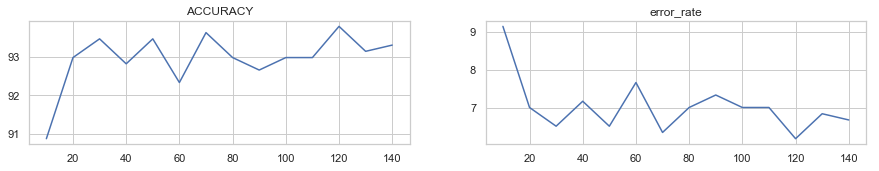

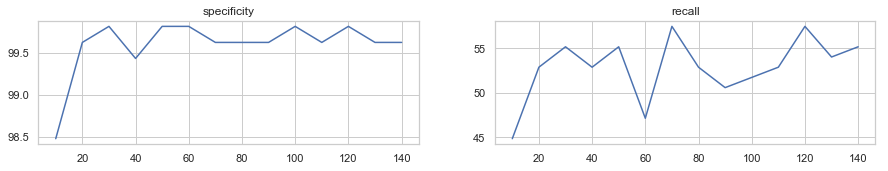

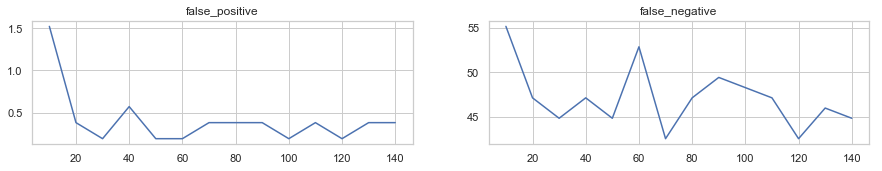

In [43]:
print('RANDOM FOREST')
sns.set(style="whitegrid")
plt.figure(1)
plt.figure(figsize=(15,5))
plt.subplot(221)
plt.title('ACCURACY')
sns.lineplot(x = tree_numbers, y = accuracy)
plt.subplot(222)
plt.title('error_rate')
sns.lineplot(x = tree_numbers, y = error_rate )

plt.figure(2)
plt.figure(figsize=(15,5))
plt.subplot(221)
plt.title('specificity')
sns.lineplot(x = tree_numbers, y = specificity)
plt.subplot(222)
plt.title('recall')
sns.lineplot(x = tree_numbers, y = recall )

plt.figure(3)
plt.figure(figsize=(15,5))
plt.subplot(221)
plt.title('false_positive')
sns.lineplot(x = tree_numbers, y = false_positive)
plt.subplot(222)
plt.title('false_negative')
sns.lineplot(x = tree_numbers, y = false_negative )





### Process 2

In [44]:
from sklearn.ensemble import RandomForestClassifier
RF_model2 = RandomForestClassifier(n_estimators= 50).fit(x_train2,y_train2)
RF_estimated2 = RF_model2.predict(x_test2)
rf_result2 = model_acc(y_test2,RF_estimated2)

Accuracy :94.75%		Error Rate :5.25%
Specificity :99.3%	Recall :68.04%
False Positive :0.7%	Fasle Negative :31.96%
[[566   4]
 [ 31  66]]


In [45]:
accuracy1, error_rate1, specificity1, recall1, false_positive1, false_negative1 = [],[],[],[],[],[]

for number in tree_numbers:
    from sklearn.ensemble import RandomForestClassifier
    model_build = RandomForestClassifier(n_estimators= number).fit(x_train2,y_train2)
    model_estimated = model_build.predict(x_test2)
    rf_result = model_acc(y_test2,model_estimated)
    accuracy1.append(rf_result[0])
    error_rate1.append(rf_result[1])
    specificity1.append(rf_result[2])
    recall1.append(rf_result[3])
    false_positive1.append(rf_result[4])
    false_negative1.append(rf_result[5])

Accuracy :94.0%		Error Rate :6.0%
Specificity :99.3%	Recall :62.89%
False Positive :0.7%	Fasle Negative :37.11%
[[566   4]
 [ 36  61]]
Accuracy :94.15%		Error Rate :5.85%
Specificity :99.3%	Recall :63.92%
False Positive :0.7%	Fasle Negative :36.08%
[[566   4]
 [ 35  62]]
Accuracy :94.6%		Error Rate :5.4%
Specificity :99.3%	Recall :67.01%
False Positive :0.7%	Fasle Negative :32.99%
[[566   4]
 [ 32  65]]
Accuracy :94.3%		Error Rate :5.7%
Specificity :99.47%	Recall :63.92%
False Positive :0.53%	Fasle Negative :36.08%
[[567   3]
 [ 35  62]]
Accuracy :94.3%		Error Rate :5.7%
Specificity :99.3%	Recall :64.95%
False Positive :0.7%	Fasle Negative :35.05%
[[566   4]
 [ 34  63]]
Accuracy :94.9%		Error Rate :5.1%
Specificity :99.47%	Recall :68.04%
False Positive :0.53%	Fasle Negative :31.96%
[[567   3]
 [ 31  66]]
Accuracy :94.0%		Error Rate :6.0%
Specificity :99.12%	Recall :63.92%
False Positive :0.88%	Fasle Negative :36.08%
[[565   5]
 [ 35  62]]
Accuracy :94.6%		Error Rate :5.4%
Specificity :

In [46]:
np.array(accuracy1).max()

94.90254872563717

<Figure size 432x288 with 0 Axes>

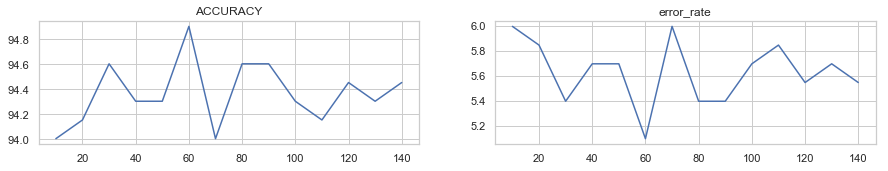

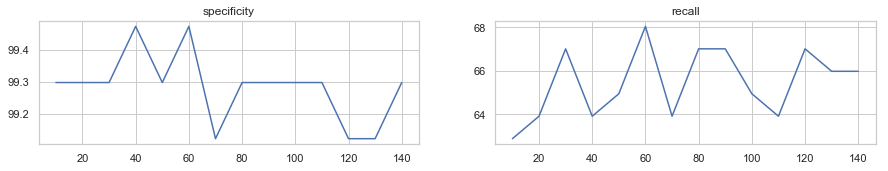

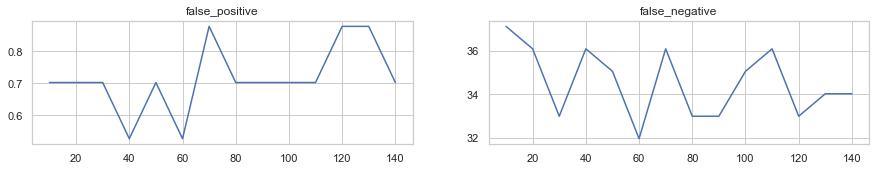

In [47]:
sns.set(style="whitegrid")
plt.figure(1)
plt.figure(figsize=(15,5))
plt.subplot(221)
plt.title('ACCURACY')
sns.lineplot(x = tree_numbers, y = accuracy1)
plt.subplot(222)
plt.title('error_rate')
sns.lineplot(x = tree_numbers, y = error_rate1 )

plt.figure(2)
plt.figure(figsize=(15,5))
plt.subplot(221)
plt.title('specificity')
sns.lineplot(x = tree_numbers, y = specificity1)
plt.subplot(222)
plt.title('recall')
sns.lineplot(x = tree_numbers, y = recall1 )

plt.figure(3)
plt.figure(figsize=(15,5))
plt.subplot(221)
plt.title('false_positive')
sns.lineplot(x = tree_numbers, y = false_positive1)
plt.subplot(222)
plt.title('false_negative')
sns.lineplot(x = tree_numbers, y = false_negative1 )




# As per the above parameters
### Process1 and Process2 accurary is quite similar (2% higher accraracy)
### Process2 tend to perform better at some extent as compare to process1 in Random Forest

### 4. k-Nearest Neighbors Algorithm

### Process 1

In [48]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(x_train,y_train)
knn_estimated = KNN_model.predict(x_test)
knn_result = model_acc(y_test,knn_estimated)

Accuracy :86.46%		Error Rate :13.54%
Specificity :98.86%	Recall :11.49%
False Positive :1.14%	Fasle Negative :88.51%
[[520   6]
 [ 77  10]]


In [49]:
accuracy1, error_rate1, specificity1, recall1, false_positive1, false_negative1 = [],[],[],[],[],[]
cluster_number = [3,5,7,9,11,13,15,17,19,21]
for number in cluster_number:
    from sklearn.neighbors import KNeighborsClassifier
    print('Number of cluster :{}'.format(number) )
    model_build = KNeighborsClassifier(n_neighbors = number).fit(x_train,y_train)
    
    model_estimated = model_build.predict(x_test)
    
    result = model_acc(y_test,model_estimated)
    
    accuracy1.append(result[0])
    error_rate1.append(result[1])
    specificity1.append(result[2])
    recall1.append(result[3])
    false_positive1.append(result[4])
    false_negative1.append(result[5])

Number of cluster :3
Accuracy :84.99%		Error Rate :15.01%
Specificity :96.58%	Recall :14.94%
False Positive :3.42%	Fasle Negative :85.06%
[[508  18]
 [ 74  13]]
Number of cluster :5
Accuracy :85.97%		Error Rate :14.03%
Specificity :98.1%	Recall :12.64%
False Positive :1.9%	Fasle Negative :87.36%
[[516  10]
 [ 76  11]]
Number of cluster :7
Accuracy :86.3%		Error Rate :13.7%
Specificity :98.67%	Recall :11.49%
False Positive :1.33%	Fasle Negative :88.51%
[[519   7]
 [ 77  10]]
Number of cluster :9
Accuracy :86.46%		Error Rate :13.54%
Specificity :98.86%	Recall :11.49%
False Positive :1.14%	Fasle Negative :88.51%
[[520   6]
 [ 77  10]]
Number of cluster :11
Accuracy :85.97%		Error Rate :14.03%
Specificity :99.24%	Recall :5.75%
False Positive :0.76%	Fasle Negative :94.25%
[[522   4]
 [ 82   5]]
Number of cluster :13
Accuracy :86.13%		Error Rate :13.87%
Specificity :99.43%	Recall :5.75%
False Positive :0.57%	Fasle Negative :94.25%
[[523   3]
 [ 82   5]]
Number of cluster :15
Accuracy :86.13%

In [50]:
print(np.array(accuracy1).max())

86.4600326264274


<Figure size 432x288 with 0 Axes>

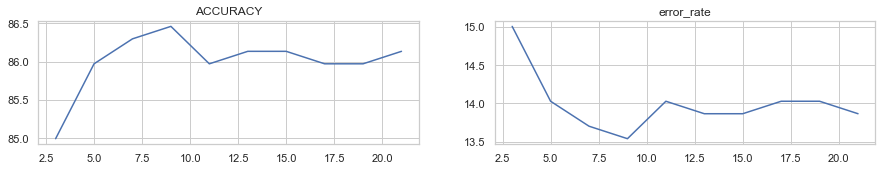

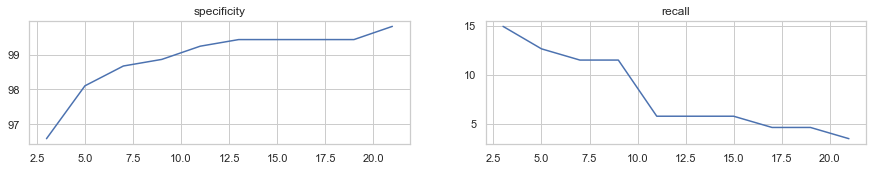

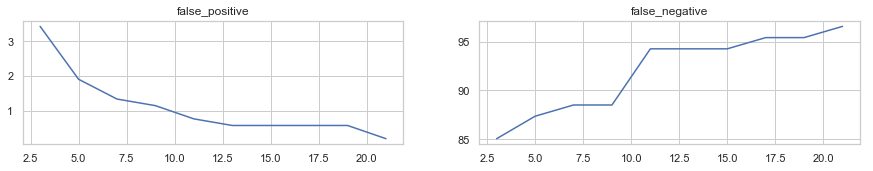

In [51]:
sns.set(style="whitegrid")
plt.figure(1)
plt.figure(figsize=(15,5))
plt.subplot(221)
plt.title('ACCURACY')
sns.lineplot(x = cluster_number, y = accuracy1)
plt.subplot(222)
plt.title('error_rate')
sns.lineplot(x = cluster_number, y = error_rate1 )

plt.figure(2)
plt.figure(figsize=(15,5))
plt.subplot(221)
plt.title('specificity')
sns.lineplot(x = cluster_number, y = specificity1)
plt.subplot(222)
plt.title('recall')
sns.lineplot(x = cluster_number, y = recall1 )

plt.figure(3)
plt.figure(figsize=(15,5))
plt.subplot(221)
plt.title('false_positive')
sns.lineplot(x = cluster_number, y = false_positive1)
plt.subplot(222)
plt.title('false_negative')
sns.lineplot(x = cluster_number, y = false_negative1 )

### Process 2

In [52]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model2 = KNeighborsClassifier(n_neighbors = 9).fit(x_train2,y_train2)
knn_estimated2 = KNN_model2.predict(x_test2)
knn_result2 = model_acc(y_test2,knn_estimated2)

Accuracy :86.36%		Error Rate :13.64%
Specificity :99.65%	Recall :8.25%
False Positive :0.35%	Fasle Negative :91.75%
[[568   2]
 [ 89   8]]


In [53]:
accuracy1, error_rate1, specificity1, recall1, false_positive1, false_negative1 = [],[],[],[],[],[]
cluster_number = [3,5,7,9,11,13,15,17,19,21]
for number in cluster_number:
    from sklearn.neighbors import KNeighborsClassifier
    model_build = KNeighborsClassifier(n_neighbors = number).fit(x_train2,y_train2)
    print('Number of cluster :{}'.format(number) )
    model_estimated = model_build.predict(x_test2)
    
    result = model_acc(y_test2,model_estimated)
    
    accuracy1.append(result[0])
    error_rate1.append(result[1])
    specificity1.append(result[2])
    recall1.append(result[3])
    false_positive1.append(result[4])
    false_negative1.append(result[5])


Number of cluster :3
Accuracy :85.76%		Error Rate :14.24%
Specificity :96.84%	Recall :20.62%
False Positive :3.16%	Fasle Negative :79.38%
[[552  18]
 [ 77  20]]
Number of cluster :5
Accuracy :86.66%		Error Rate :13.34%
Specificity :98.42%	Recall :17.53%
False Positive :1.58%	Fasle Negative :82.47%
[[561   9]
 [ 80  17]]
Number of cluster :7
Accuracy :86.96%		Error Rate :13.04%
Specificity :99.47%	Recall :13.4%
False Positive :0.53%	Fasle Negative :86.6%
[[567   3]
 [ 84  13]]
Number of cluster :9
Accuracy :86.36%		Error Rate :13.64%
Specificity :99.65%	Recall :8.25%
False Positive :0.35%	Fasle Negative :91.75%
[[568   2]
 [ 89   8]]
Number of cluster :11
Accuracy :86.06%		Error Rate :13.94%
Specificity :99.82%	Recall :5.15%
False Positive :0.18%	Fasle Negative :94.85%
[[569   1]
 [ 92   5]]
Number of cluster :13
Accuracy :85.91%		Error Rate :14.09%
Specificity :99.82%	Recall :4.12%
False Positive :0.18%	Fasle Negative :95.88%
[[569   1]
 [ 93   4]]
Number of cluster :15
Accuracy :85.91

In [54]:
print(np.array(accuracy1).max())

86.95652173913044


<Figure size 432x288 with 0 Axes>

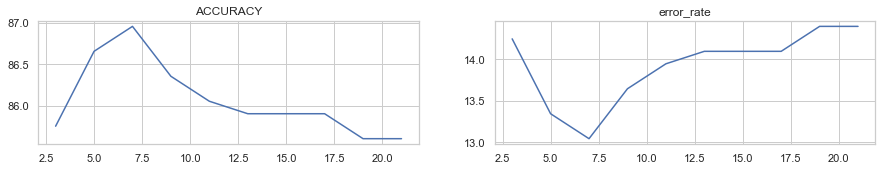

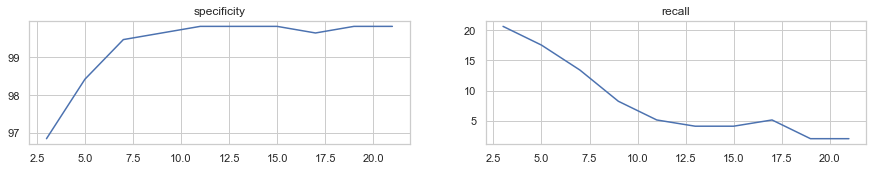

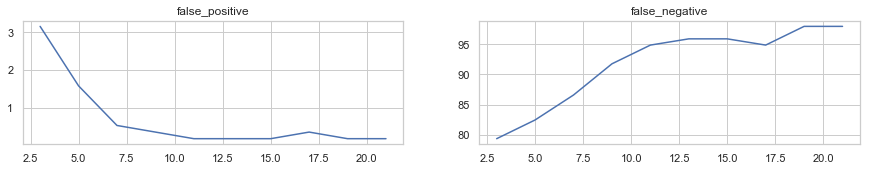

In [55]:
sns.set(style="whitegrid")
plt.figure(1)
plt.figure(figsize=(15,5))
plt.subplot(221)
plt.title('ACCURACY')
sns.lineplot(x = cluster_number, y = accuracy1)
plt.subplot(222)
plt.title('error_rate')
sns.lineplot(x = cluster_number, y = error_rate1 )

plt.figure(2)
plt.figure(figsize=(15,5))
plt.subplot(221)
plt.title('specificity')
sns.lineplot(x = cluster_number, y = specificity1)
plt.subplot(222)
plt.title('recall')
sns.lineplot(x = cluster_number, y = recall1 )

plt.figure(3)
plt.figure(figsize=(15,5))
plt.subplot(221)
plt.title('false_positive')
sns.lineplot(x = cluster_number, y = false_positive1)
plt.subplot(222)
plt.title('false_negative')
sns.lineplot(x = cluster_number, y = false_negative1 )

# As per the above parameters
### Process1 and Process2 accurary is quite similar
### Process2 tend to perform better at some extent as compare to process1 in KNN

# Final Inference:

# As per the above analysis and result genrated.
# Random Forest algorithm tend to provide the better result in respect to this data set

# Moreover, after the impution of outlier with KNN imputation the accuracy of all the algorithm increases at some extent and in respect to random forest the accraracy in 2% more as compare to outlier deletation technique



# So the final model selection with respect to the data set will be Random Forest and Outlier technique will be KNN imputation